In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

In [2]:
dataframe = pd.read_csv('dataframe_PCA.csv')
X = dataframe.drop(columns=['Label', 'Patient index'])
y = dataframe['Label']

test_size = 0.1
random_state = 21

results_SVM = []
print(f"Test size: {test_size}, Random state: {random_state}")

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)



# 训练决策树分类器 Train Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

Test size: 0.1, Random state: 21


DecisionTreeClassifier(random_state=42)

Decision Tree Classifier Results:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       295
           1       0.59      0.52      0.55       238

    accuracy                           0.62       533
   macro avg       0.62      0.61      0.61       533
weighted avg       0.62      0.62      0.62       533

Classification report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68       295
           1       0.59      0.52      0.55       238

    accuracy                           0.62       533
   macro avg       0.62      0.61      0.61       533
weighted avg       0.62      0.62      0.62       533

Confusion matrix:
 [[209  86]
 [115 123]]


/opt/homebrew/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing f

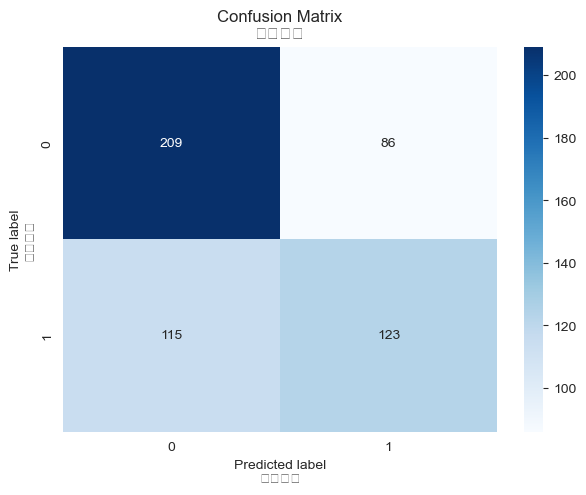

Accuracy: 0.6228893058161351
Precision: 0.6198127495731262
Recall: 0.6228893058161351
F1 score: 0.6194901808968397


In [3]:
# 评估随机森林分类器 Evaluate Random Forest classifier
y_pred = dt_clf.predict(X_test)
print("Decision Tree Classifier Results:")
print(classification_report(y_test, y_pred))

# 评估性能
print("Classification report:\n", classification_report(y_test, y_pred))

# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

# 绘制中英文混淆矩阵
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label\n预测标签')
plt.ylabel('True label\n真实标签')
plt.title('Confusion Matrix\n混淆矩阵')
plt.show()

# 性能指标
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))